## RFM Class Visualization

From the RFM Modeling we were able to create RFM class for each customer, we will now explore relationship between individual columns and see if there are any outliers or notable data to discuss futher.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The RFM Data

In [2]:
data = pd.read_csv('RFM_data/sample_rfm_table.csv')

In [3]:
data.head()

,customer,recency,frequency,monetary_value,R_Class,F_Class,M_Class,RFMClass
0,Aaron Bergman,2666,3,887,4,4,4,444
1,Aaron Hawkins,2263,7,1744,1,2,3,123
2,Aaron Smayling,2339,7,3050,3,2,2,322
3,Adam Bellavance,2305,8,7756,2,2,1,221
4,Adam Hart,2285,10,3249,2,1,2,212


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer        793 non-null    object
 1   recency         793 non-null    int64 
 2   frequency       793 non-null    int64 
 3   monetary_value  793 non-null    int64 
 4   R_Class         793 non-null    int64 
 5   F_Class         793 non-null    int64 
 6   M_Class         793 non-null    int64 
 7   RFMClass        793 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 49.7+ KB


Exploring the count (frequency), mean and median of each category (frequency, recency and monetary value).

In [10]:
data.frequency.value_counts() #the highest amount of time someone purchase a product is 5 and lowest is 17

5     134
7     116
6     107
4      96
8      82
9      71
3      53
10     39
2      34
11     23
12     18
1      12
13      7
17      1
Name: frequency, dtype: int64

In [35]:
data.frequency.mean()

6.316519546027743

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 77 to 0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer        793 non-null    object
 1   recency         793 non-null    int64 
 2   frequency       793 non-null    int64 
 3   monetary_value  793 non-null    int64 
 4   R_Class         793 non-null    int64 
 5   F_Class         793 non-null    int64 
 6   M_Class         793 non-null    int64 
 7   RFMClass        793 non-null    object
dtypes: int64(6), object(2)
memory usage: 55.8+ KB


In [8]:
data[data['RFMClass']== '111'].sort_values('monetary_value', ascending=False).head(5)

,customer,recency,frequency,monetary_value,R_Class,F_Class,M_Class,RFMClass
672,Sanjit Engle,2260,11,12210,1,1,1,111
387,John Lee,2272,11,9801,1,1,1,111
603,Pete Kriz,2260,12,8647,1,1,1,111
322,Harry Marie,2253,10,8237,1,1,1,111
457,Lena Creighton,2267,12,7661,1,1,1,111


In [36]:
data.frequency.median()

6.0

In [11]:
data.recency.value_counts()

2279    14
2308    13
2292    13
2280    11
2257    11
        ..
2489     1
2490     1
2491     1
2492     1
3063     1
Name: recency, Length: 300, dtype: int64

In [12]:
data.recency.mean()

2397.8058007566206

In [13]:
data.recency.median()

2326.0

In [14]:
data.monetary_value.value_counts()

2163    4
1686    3
3256    3
3059    2
1429    2
       ..
5455    1
4432    1
1361    1
2006    1
359     1
Name: monetary_value, Length: 744, dtype: int64

In [15]:
data.monetary_value.mean()

2896.924337957125

In [16]:
data.monetary_value.median()

2257.0

### Correlations and Relationship

Exploring the correlation of each column to each other to see if there are any significant trends or annomalies.

In [5]:
data_corr = data.corr()
data_corr

,recency,frequency,monetary_value,R_Class,F_Class,M_Class,RFMClass
recency,1.000000,-0.384011,-0.142614,0.745296,0.336194,0.214640,0.753649
frequency,-0.384011,1.000000,0.417722,-0.305466,-0.918584,-0.538611,-0.392859
monetary_value,-0.142614,0.417722,1.000000,-0.105077,-0.369935,-0.785777,-0.146410
R_Class,0.745296,-0.305466,-0.105077,1.000000,0.299056,0.190869,0.994768
F_Class,0.336194,-0.918584,-0.369935,0.299056,1.000000,0.502863,0.394651
M_Class,0.214640,-0.538611,-0.785777,0.190869,0.502863,1.000000,0.244595
RFMClass,0.753649,-0.392859,-0.146410,0.994768,0.394651,0.244595,1.000000


Text(0.5, 1, 'RFM data Correlation heatmap')

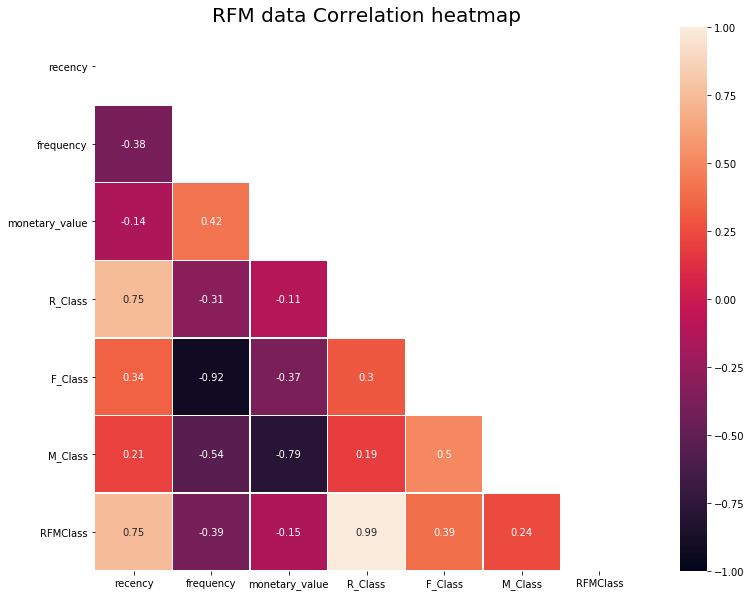

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))

mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data_corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)
ax.set_title("RFM data Correlation heatmap",fontsize=20)

In [7]:
#changing data to object for easier manipulation
data['RFMClass'] = data['RFMClass'].apply(str)

In [9]:
data.sort_values('RFMClass', ascending=True).head(50)

,customer,recency,frequency,monetary_value,R_Class,F_Class,M_Class,RFMClass
77,Ben Ferrer,2267,11,5907,1,1,1,111
659,Russell Applegate,2263,9,4793,1,1,1,111
102,Brenda Bowman,2279,9,6766,1,1,1,111
672,Sanjit Engle,2260,11,12210,1,1,1,111
213,Dean Katz,2261,9,4801,1,1,1,111
588,Patrick O'Brill,2255,11,7474,1,1,1,111
603,Pete Kriz,2260,12,8647,1,1,1,111
615,Quincy Jones,2276,9,6109,1,1,1,111
190,Dan Reichenbach,2254,9,6528,1,1,1,111
629,Rick Bensley,2260,12,4716,1,1,1,111


Visualizing the correlation following the heatmap

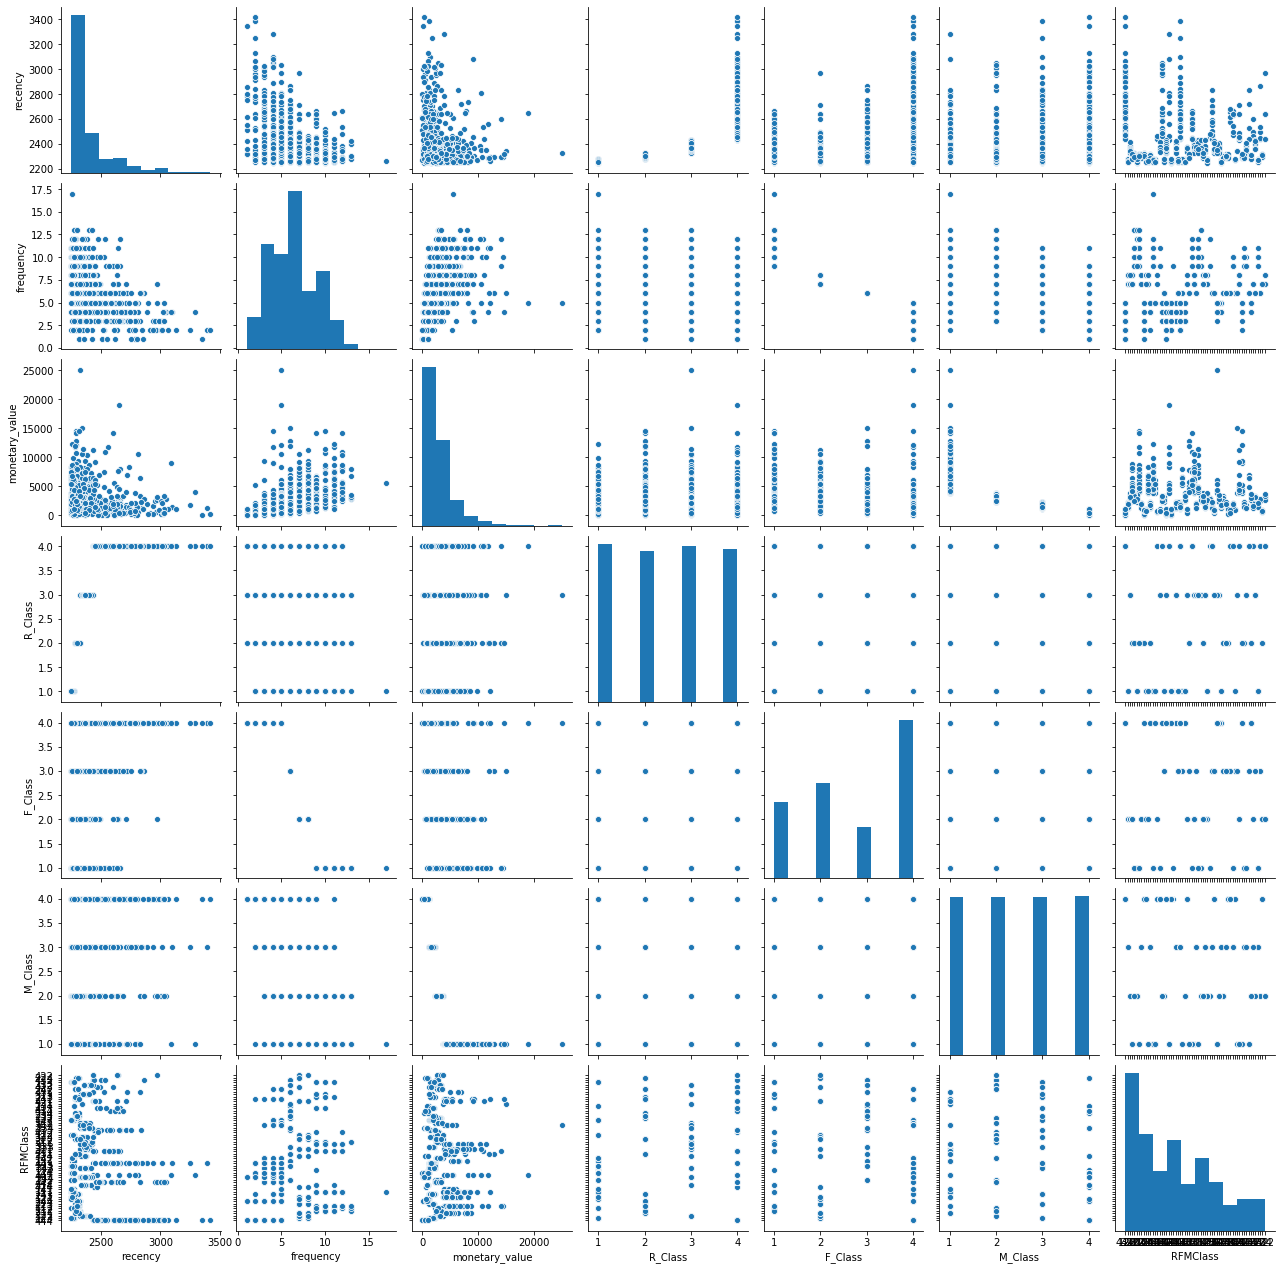

In [17]:
sns.pairplot(data)

In [18]:
#creating a clearer picture of the correlation of each category (recency,frequency,monetary value)
data_pp = data[['recency','monetary_value','frequency']]

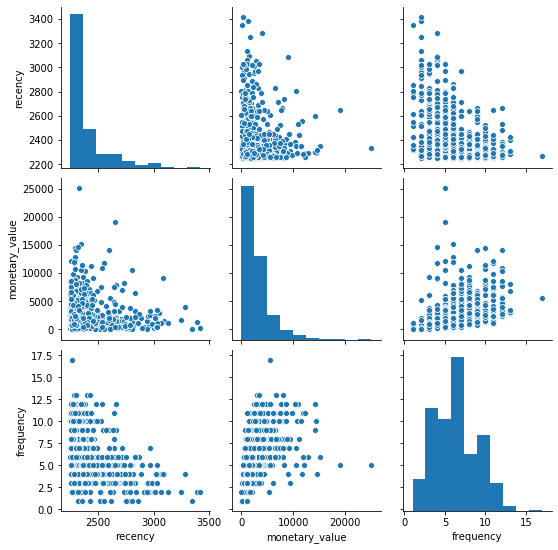

In [19]:
sns.pairplot(data_pp)

Between the three category there is a relatively positive relationship between them. The most significant relationship is between monetary value and frequency which have a positive correlation to each other. 

Overall, there is not much relationship between each category.

### Individual RFM Visualization

From looking at the correlations, heatmap and pairplot we will now take a closer look at some of the relationship.

In [38]:
def plot_hist(dataframe,columns,title,xaxis,colors):
    fig, axs = plt.subplots(1,len(columns),figsize=(15,len(columns)))
    for i, column in enumerate(columns): 
        axs[i].hist(dataframe[column],color=colors)
        axs[i].set_title(title[i])
        axs[i].set_xlabel(xaxis[i])
        
    plt.tight_layout()

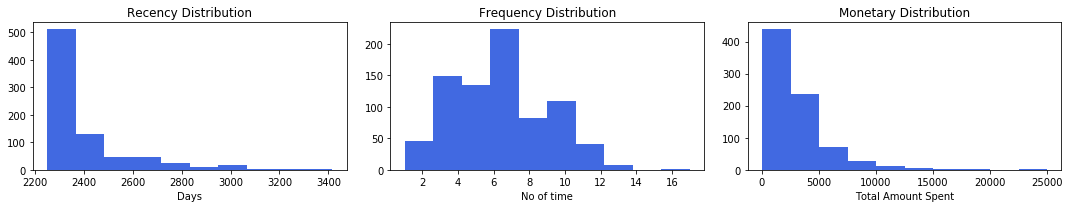

In [41]:
#Histogram to show the distribution of each category
col = ['recency','frequency','monetary_value']
titles = ['Recency Distribution','Frequency Distribution','Monetary Distribution']
xaxis = ['Days','No of time','Total Amount Spent']

plot_hist(data,col,titles,xaxis,'royalblue')

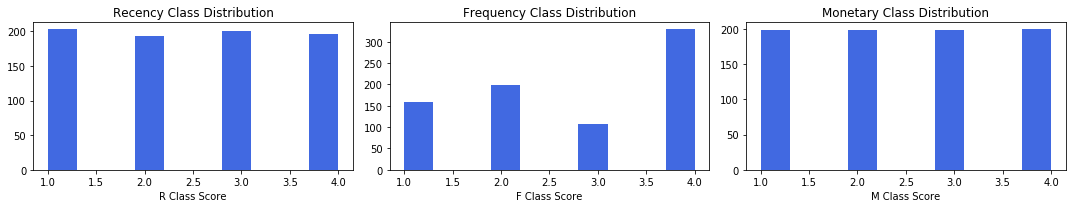

In [40]:
#Histogram to show the distribution of each category score
col = ['R_Class','F_Class','M_Class']
titles = ['Recency Class Distribution','Frequency Class Distribution','Monetary Class Distribution']
xaxis = ['R Class Score','F Class Score','M Class Score']

plot_hist(data,col,titles,xaxis,'royalblue')

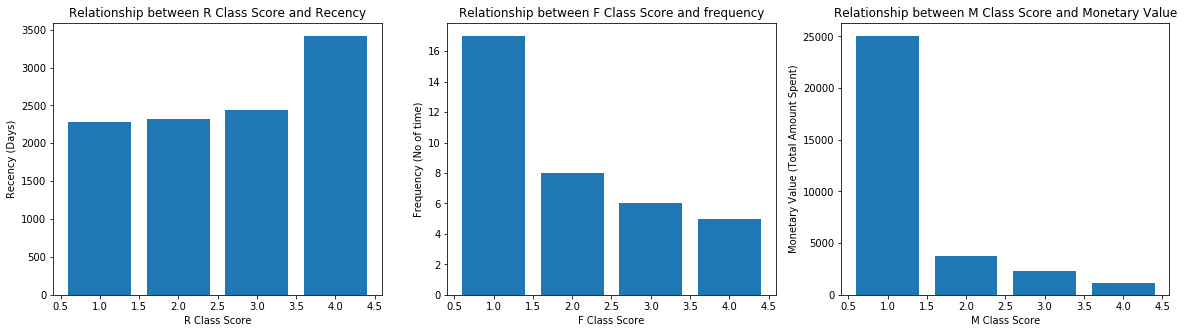

In [67]:
#Bar garph to show the relationship between the category value and their respective class score
plt.figure(figsize = (20,5))

ax1 = plt.subplot(1, 3, 1)
ax1 = plt.bar(data['R_Class'], data['recency'])
ax1 = plt.title('Relationship between R Class Score and Recency')
ax1 = plt.xlabel('R Class Score')
ax1 = plt.ylabel('Recency (Days)')

ax2 = plt.subplot(1, 3, 2)
ax2 = plt.bar(data['F_Class'], data['frequency'])
ax2 = plt.title('Relationship between F Class Score and frequency')
ax2 = plt.xlabel('F Class Score')
ax2 = plt.ylabel('Frequency (No of time)')

ax3 = plt.subplot(1, 3, 3)
ax3 = plt.bar(data['M_Class'], data['monetary_value'])
ax3 = plt.title('Relationship between M Class Score and Monetary Value')
ax3 = plt.xlabel('M Class Score')
ax3 = plt.ylabel('Monetary Value (Total Amount Spent)')

### RFM Score Relationship

Now we will explore the RFM Score relationship with individual category (recency, frequency, monetary value)

In [30]:
RFM_sort = data
RFM_sort.sort_values(by = 'RFMClass', inplace = True)
RFM_sort.head()

,customer,recency,frequency,monetary_value,R_Class,F_Class,M_Class,RFMClass
77,Ben Ferrer,2267,11,5907,1,1,1,111
659,Russell Applegate,2263,9,4793,1,1,1,111
102,Brenda Bowman,2279,9,6766,1,1,1,111
672,Sanjit Engle,2260,11,12210,1,1,1,111
213,Dean Katz,2261,9,4801,1,1,1,111


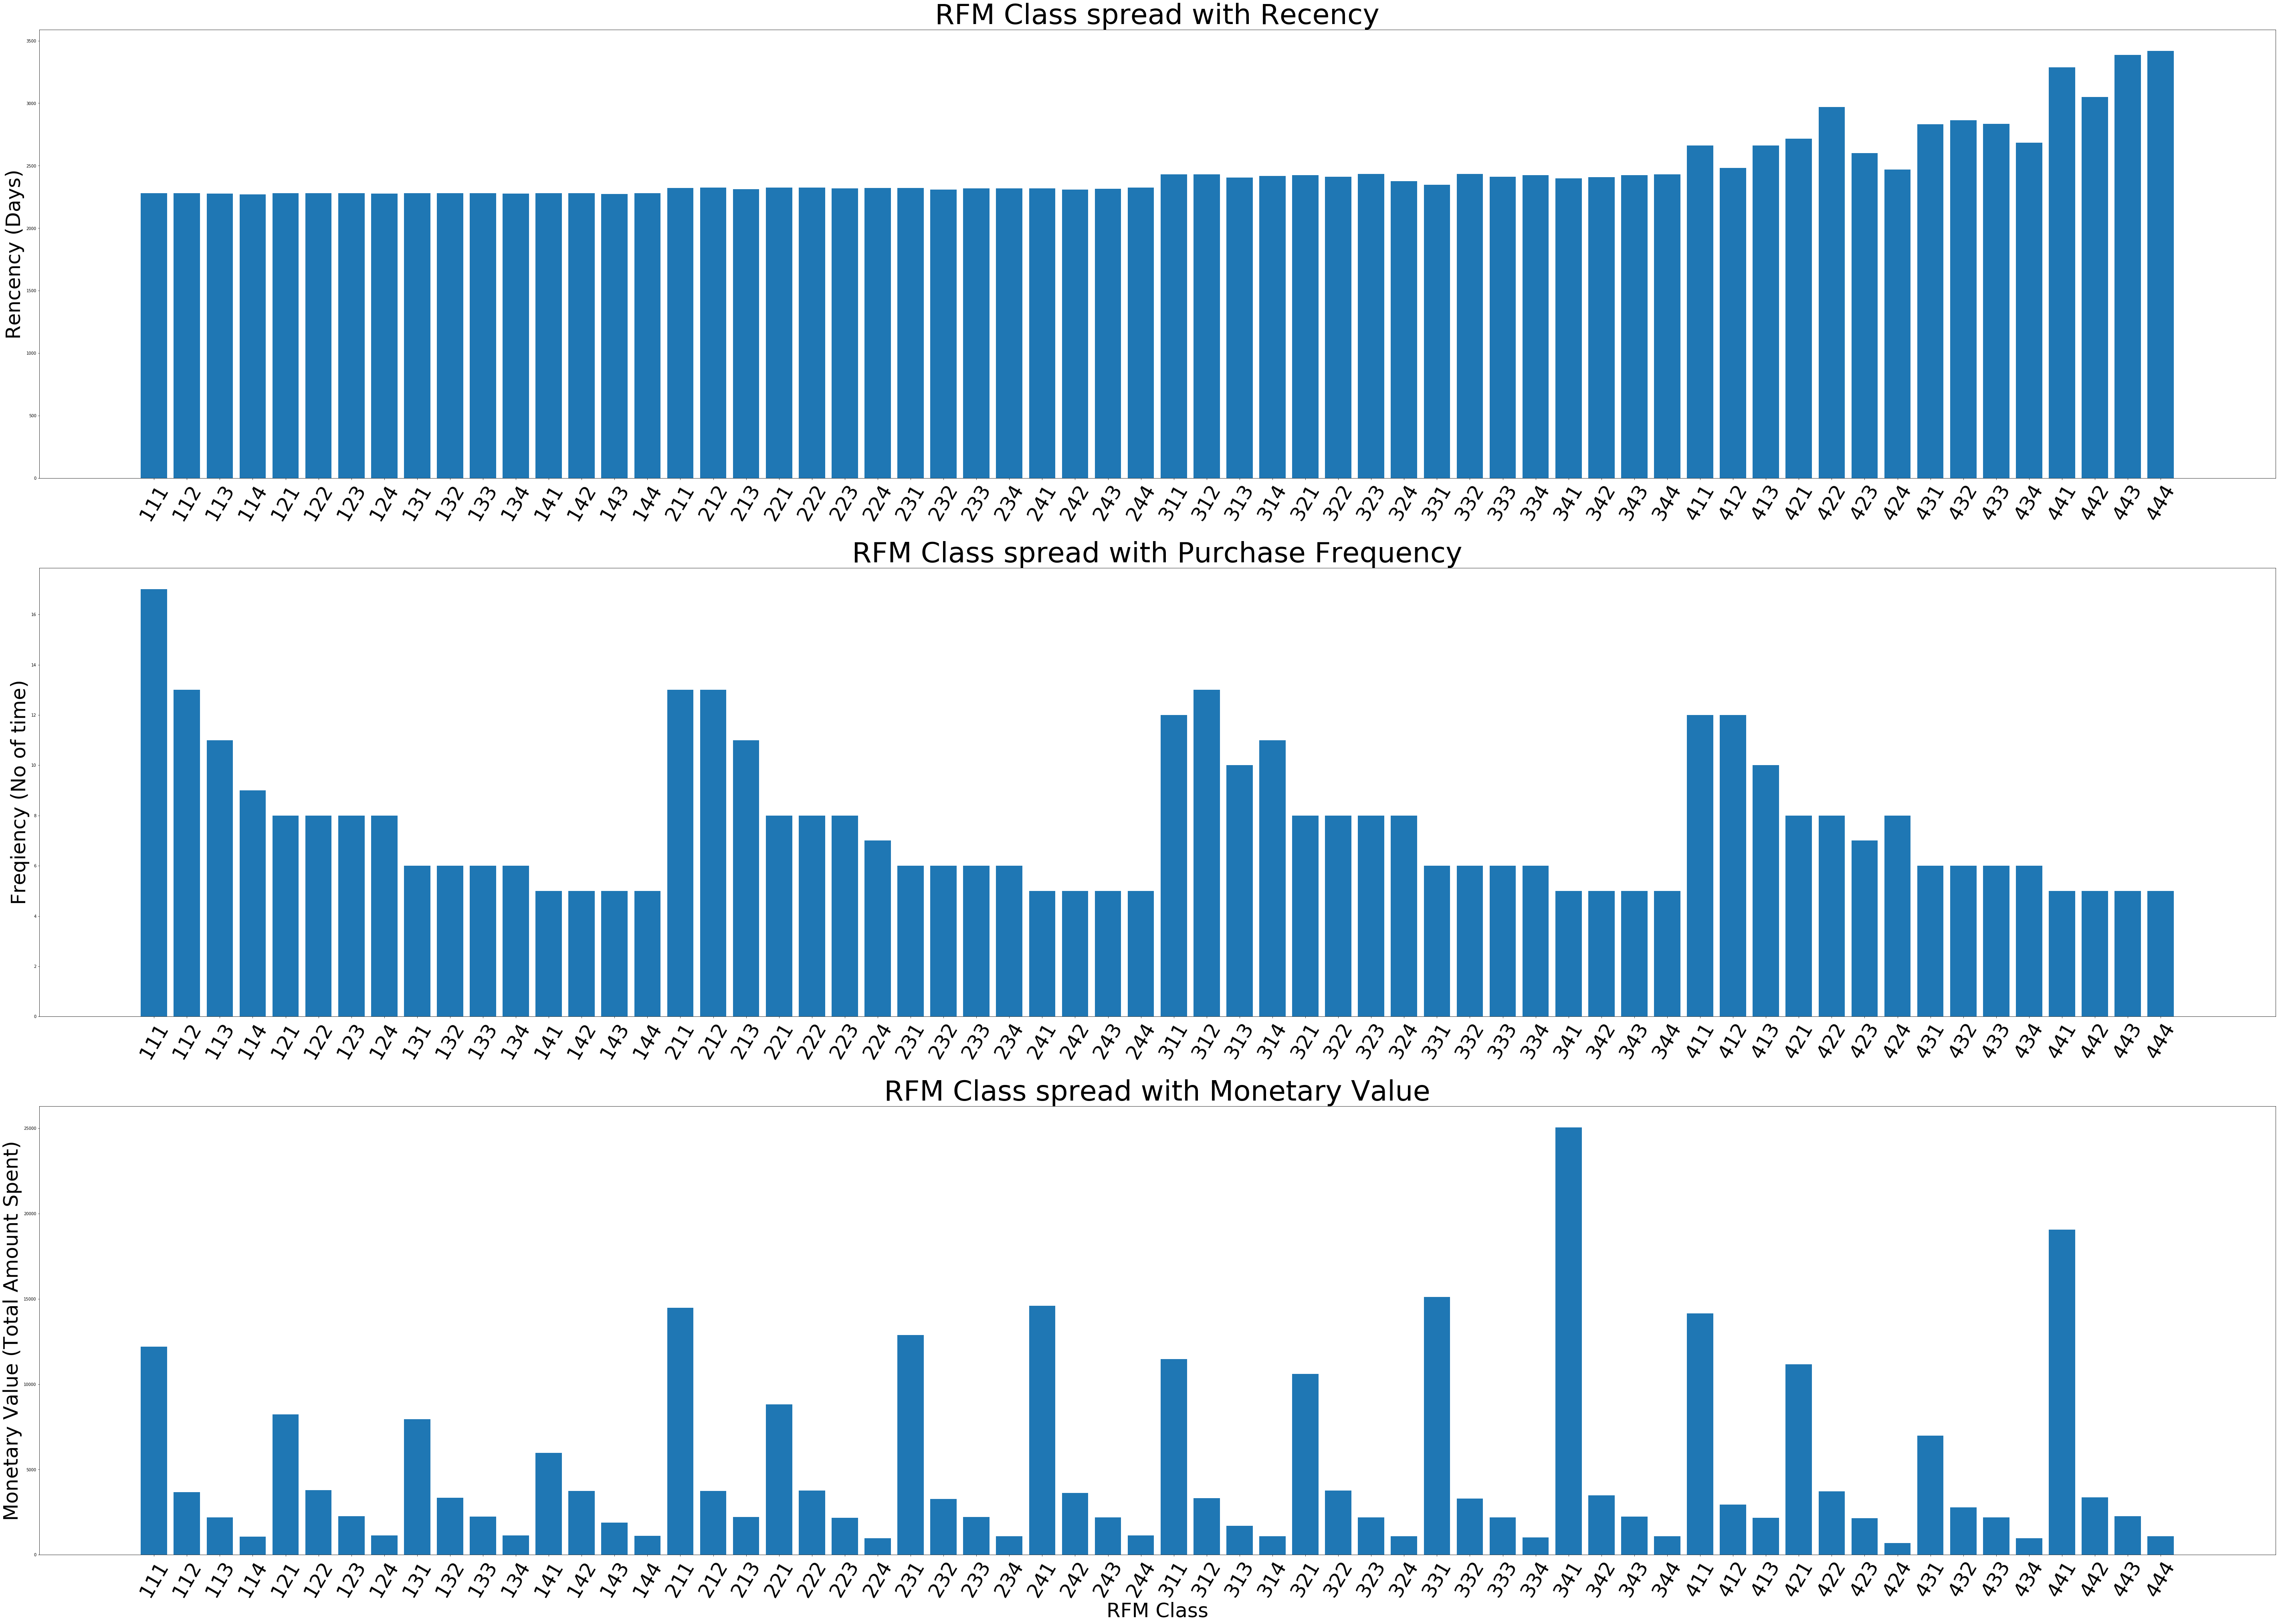

In [84]:
plt.figure(figsize = (100, 70))

ax1 = plt.subplot(3, 1, 1)
ax1 = plt.bar(RFM_sort['RFMClass'], RFM_sort['recency'])
ax1 = plt.title('RFM Class spread with Recency',fontsize=70)
ax1 = plt.xticks(rotation = 60,fontsize=50)
#ax1 = plt.xlabel('RFM Class',fontsize=50)
ax1 = plt.ylabel('Rencency (Days)',fontsize=50)

ax2 = plt.subplot(3, 1, 2)
ax2 = plt.bar(RFM_sort['RFMClass'], RFM_sort['frequency'])
ax2 = plt.title('RFM Class spread with Purchase Frequency',fontsize=70)
ax2 = plt.xticks(rotation = 60,fontsize=50)
#ax2 = plt.xlabel('RFM Class',fontsize=50)
ax2 = plt.ylabel('Freqiency (No of time)',fontsize=50)

ax3 = plt.subplot(3, 1, 3)
ax3 = plt.bar(RFM_sort['RFMClass'], RFM_sort['monetary_value'])
ax3 = plt.title('RFM Class spread with Monetary Value',fontsize=70)
ax3 = plt.xticks(rotation = 60,fontsize=50)
ax3 = plt.xlabel('RFM Class',fontsize=50)
ax3 = plt.ylabel('Monetary Value (Total Amount Spent)',fontsize=50)